# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education. 

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms. 
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers, 
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn. 
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc 
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [1]:
'''
import warnings: This imports the Python warnings module, which provides a way to handle warnings that may be issued during the execution of code.
Warnings are typically used to alert the user to issues that may not prevent the program from running but could indicate potential problems or inefficiencies.
'''
import warnings

'''
This line tells Python to ignore all warning messages.
By setting the filter to "ignore", you're instructing the interpreter not to display warnings in the output. 
'''
warnings.filterwarnings("ignore")

'''
This imports the ConvergenceWarning class from the statsmodels library.
A ConvergenceWarning is typically issued when an algorithm, e.g. a statistical estimation procedure,
fails to converge to a solution within the allowed number of iterations or other specified conditions.
'''
from statsmodels.tools.sm_exceptions import ConvergenceWarning

'''
However, This line specifically suppresses ConvergenceWarning messages. By adding this filter, you instruct Python to ignore only warnings of this type. 
This is useful when you know that the warnings are not critical to your analysis or when you're aware of potential convergence issues but do not want them
to interrupt your workflow.
'''
warnings.simplefilter("ignore", ConvergenceWarning)

'''
The lines above ensure:-
    Clean Output: Suppressing warnings can make the output more readable, especially in cases where warnings are frequent but not significant to the user's current task.
    Focus on Relevant Issues: It helps to focus on more critical errors or messages, reducing noise from non-essential warnings.
    Context-Specific Suppression: By targeting specific types of warnings, such as ConvergenceWarning, you can suppress only the warnings that are less relevant to your
    current analysis, while still being alerted to other potential issues.
'''

# Libraries to help with reading and manipulating data in data frames or other data structures.

import pandas as pd
import numpy as np

# Library to split data into Train and Test datasets
from sklearn.model_selection import train_test_split

# libaries to help with data visualization in univariate and bivariate analysis
import matplotlib.pyplot as plt
import seaborn as sns

'''
The line below removes the limit for the number of displayed columns.
The flag 'None' is responsible for this effect
'''
pd.set_option("display.max_columns", None)

# The line beloe sets the limit for the number of displayed rows to 200
pd.set_option("display.max_rows", 200)

'''
This will set the precision of floating numbers in the data frame sataset to 5 decimal points.
We call an in-line lambda function to define the value of x
'''
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# To build model for prediction we import the following classes from statsmodels and sklear libraries
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
#from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

# To tune the different models we come up with we import the GridSearchCV  class
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
import sklearn.metrics as metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
    mean_squared_error,
    r2_score,
    mean_absolute_error
)

# To check model performance

## Import The relevant dataset

In [2]:
# read the data from the CSV file ExtraaLearn.csv into the data frame initialised as df
df = pd.read_csv("ExtraaLearn.csv")

# It is prudent to copy the data to another variable to avoid any inadvertent changes to the original data
data = df.copy()
data1 = data

## Data Overview

- Observations
    - It is curious that that [page_views_per_visit] feature is of float. I would have expcted it to be of datatype int. But from the data it is indeed float.
    - We have 15 columns and 4612 records/rows
    - Most data (10 rows) is categorical and of the data type object
    - The age, web visits,time spent, page views and status are of numerical dataypes int64 and float64
    - No column has a null or empty value
- Sanity checks

#### View the first 5 rows of the dataset using the command below

In [3]:
# Such a function call can help identify any unexpected values, missing data, or inconsistencies.
data.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.86100,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.32000,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.07400,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.05700,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.91400,Email Activity,No,No,No,No,No,0


#### View the last 5 rows of the dataset using the command below

In [4]:
# Such a function call can help identify any unexpected values, missing data, or inconsistencies.
data.tail()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
4607,EXT4608,35,Unemployed,Mobile App,Medium,15,360,2.17000,Phone Activity,No,No,No,Yes,No,0
4608,EXT4609,55,Professional,Mobile App,Medium,8,2327,5.39300,Email Activity,No,No,No,No,No,0
4609,EXT4610,58,Professional,Website,High,2,212,2.69200,Email Activity,No,No,No,No,No,1
4610,EXT4611,57,Professional,Mobile App,Medium,1,154,3.87900,Website Activity,Yes,No,No,No,No,0
4611,EXT4612,55,Professional,Website,Medium,4,2290,2.07500,Phone Activity,No,No,No,No,No,0


#### View the shape of the data

In [6]:
# The output will be a tuple showing the (totaa rows, total columns)
data.shape

(4612, 15)

#### Print a detailed statistical description of the data

In [7]:
# print out a detailed statistical analysyis of the data with the statistically relevant columns as headers
data.describe()

,age,website_visits,time_spent_on_website,page_views_per_visit,status
count,4612.00000,4612.00000,4612.00000,4612.00000,4612.00000
mean,46.20121,3.56678,724.01127,3.02613,0.29857
std,13.16145,2.82913,743.82868,1.96812,0.45768
min,18.00000,0.00000,0.00000,0.00000,0.00000
25%,36.00000,2.00000,148.75000,2.07775,0.00000
50%,51.00000,3.00000,376.00000,2.79200,0.00000
75%,57.00000,5.00000,1336.75000,3.75625,1.00000
max,63.00000,30.00000,2537.00000,18.43400,1.00000


In [8]:
# print out a detailed statistical analysyis of the data with the statistically relevant and irrelevant columns as headers
data.describe(include='all')

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
count,4612,4612.00000,4612,4612,4612,4612.00000,4612.00000,4612.00000,4612,4612,4612,4612,4612,4612,4612.00000
unique,4612,NaN,3,2,3,NaN,NaN,NaN,3,2,2,2,2,2,NaN
top,EXT001,NaN,Professional,Website,High,NaN,NaN,NaN,Email Activity,No,No,No,No,No,NaN
freq,1,NaN,2616,2542,2264,NaN,NaN,NaN,2278,4115,4379,4085,3907,4519,NaN
mean,NaN,46.20121,NaN,NaN,NaN,3.56678,724.01127,3.02613,NaN,NaN,NaN,NaN,NaN,NaN,0.29857
std,NaN,13.16145,NaN,NaN,NaN,2.82913,743.82868,1.96812,NaN,NaN,NaN,NaN,NaN,NaN,0.45768
min,NaN,18.00000,NaN,NaN,NaN,0.00000,0.00000,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,0.00000
25%,NaN,36.00000,NaN,NaN,NaN,2.00000,148.75000,2.07775,NaN,NaN,NaN,NaN,NaN,NaN,0.00000
50%,NaN,51.00000,NaN,NaN,NaN,3.00000,376.00000,2.79200,NaN,NaN,NaN,NaN,NaN,NaN,0.00000
75%,NaN,57.00000,NaN,NaN,NaN,5.00000,1336.75000,3.75625,NaN,NaN,NaN,NaN,NaN,NaN,1.00000


In [12]:
# print out a detailed statistical analysyis of the data with the statistically relevant categorical columns as headers
data.describe(include=["object"])

,ID,current_occupation,first_interaction,profile_completed,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral
count,4612,4612,4612,4612,4612,4612,4612,4612,4612,4612
unique,4612,3,2,3,3,2,2,2,2,2
top,EXT001,Professional,Website,High,Email Activity,No,No,No,No,No
freq,1,2616,2542,2264,2278,4115,4379,4085,3907,4519


In [13]:
# print out a detailed statistical analysis of the data realigned with the Stats as headers instead of rows that are statistically relevant
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.00000,46.20121,13.16145,18.00000,36.00000,51.00000,57.00000,63.00000
website_visits,4612.00000,3.56678,2.82913,0.00000,2.00000,3.00000,5.00000,30.00000
time_spent_on_website,4612.00000,724.01127,743.82868,0.00000,148.75000,376.00000,1336.75000,2537.00000
page_views_per_visit,4612.00000,3.02613,1.96812,0.00000,2.07775,2.79200,3.75625,18.43400
status,4612.00000,0.29857,0.45768,0.00000,0.00000,0.00000,1.00000,1.00000


In [14]:
# print out a detailed statistical analysis of all the data realigned with the Stats as headers instead of rows that are statistically relevant
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,4612,4612,EXT001,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,4612.00000,NaN,NaN,NaN,46.20121,13.16145,18.00000,36.00000,51.00000,57.00000,63.00000
current_occupation,4612,3,Professional,2616,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first_interaction,4612,2,Website,2542,NaN,NaN,NaN,NaN,NaN,NaN,NaN
profile_completed,4612,3,High,2264,NaN,NaN,NaN,NaN,NaN,NaN,NaN
website_visits,4612.00000,NaN,NaN,NaN,3.56678,2.82913,0.00000,2.00000,3.00000,5.00000,30.00000
time_spent_on_website,4612.00000,NaN,NaN,NaN,724.01127,743.82868,0.00000,148.75000,376.00000,1336.75000,2537.00000
page_views_per_visit,4612.00000,NaN,NaN,NaN,3.02613,1.96812,0.00000,2.07775,2.79200,3.75625,18.43400
last_activity,4612,3,Email Activity,2278,NaN,NaN,NaN,NaN,NaN,NaN,NaN
print_media_type1,4612,2,No,4115,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
'''
This output enables us to quickly pick out certain salient attributes of the data and their distributions.
For example, the data in the ID field is unique and thus can be removed.
We can also begin to pick the certain parameters that are categorical, e.g. 
    - current_occupation
    - first_interaction
    - profile_completed
    - last_activity
    - print_media_type1
    - print_media_type2
    - digital_media
    - educational_channels
    - referral
'''

data.describe(include=["object"]).T

,count,unique,top,freq
ID,4612,4612,EXT001,1
current_occupation,4612,3,Professional,2616
first_interaction,4612,2,Website,2542
profile_completed,4612,3,High,2264
last_activity,4612,3,Email Activity,2278
print_media_type1,4612,2,No,4115
print_media_type2,4612,2,No,4379
digital_media,4612,2,No,4085
educational_channels,4612,2,No,3907
referral,4612,2,No,4519


#### Get more information on the data in the cell

In [16]:
data.info()
'''
From the data below we can see that:-
    - We have 15 columns and 4612 records/rows
    - Most data (10 rows) is categorical and of the data type object
    - The age, web visits,time spent, page views and status are of numerical dataypes
    - No column is empty

'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

'\nFrom the data below we can see that:-\n    - We have 15 columns and 4612 records/rows\n    - Most data (10 rows) is categorical and of the data type object\n    - The age, web visits,time spent, page views and status are of numerical dataypes\n    - No column is empty\n\n'

In [17]:
'''
Print out all the counts of all the unique values in each column of our dataset
We use a for loop to ensure that we are efficient in our expression.
Should we ever have elastic data in future, this call will not breakdown at this point
This code gives us a good view of how the data is clustered even before we start interacting with it visually in a univariate and bivariate manner 
'''

for x in data.columns:
    #print(f"{x}")
    print(f"{df[x].value_counts()}")

ID
EXT001     1
EXT2884    1
EXT3080    1
EXT3079    1
EXT3078    1
          ..
EXT1537    1
EXT1536    1
EXT1535    1
EXT1534    1
EXT4612    1
Name: count, Length: 4612, dtype: int64
age
57    385
58    382
56    330
59    328
60    238
55    200
32    188
53     91
24     90
43     89
48     88
51     88
54     88
49     87
21     86
50     85
46     85
23     85
45     84
42     83
19     81
44     81
47     80
52     77
33     76
20     75
34     74
22     71
41     70
18     66
35     66
40     63
37     60
38     58
36     58
39     52
62     48
63     47
30     44
61     38
31     38
29     36
28     27
25     17
26     15
27     14
Name: count, dtype: int64
current_occupation
Professional    2616
Unemployed      1441
Student          555
Name: count, dtype: int64
first_interaction
Website       2542
Mobile App    2070
Name: count, dtype: int64
profile_completed
High      2264
Medium    2241
Low        107
Name: count, dtype: int64
website_visits
2     1229
1      755
3      6

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

In [18]:
# Let's check for duplicate values in the data
data.duplicated().sum()

0

In [19]:
# Let's check for missing values in the data
round(data.isnull().sum() / data.isnull().count() * 100, 2)

ID                      0.00000
age                     0.00000
current_occupation      0.00000
first_interaction       0.00000
profile_completed       0.00000
website_visits          0.00000
time_spent_on_website   0.00000
page_views_per_visit    0.00000
last_activity           0.00000
print_media_type1       0.00000
print_media_type2       0.00000
digital_media           0.00000
educational_channels    0.00000
referral                0.00000
status                  0.00000
dtype: float64

In [20]:
# The field [ID] consists of unique ID values for each customer and hence will not add value to the modeling

data.drop(["ID"], axis=1, inplace=True)

In [21]:
# Print the data above, but with a little bit more formatting for redability.
# Print the % sub categories of each category

for i in data.describe(include=["object"]).columns:
    print("The unique values in", i, "are :")
    print(data[i].value_counts())
    print("=*" * 50)

The unique values in current_occupation are :
current_occupation
Professional    2616
Unemployed      1441
Student          555
Name: count, dtype: int64
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
The unique values in first_interaction are :
first_interaction
Website       2542
Mobile App    2070
Name: count, dtype: int64
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
The unique values in profile_completed are :
profile_completed
High      2264
Medium    2241
Low        107
Name: count, dtype: int64
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
The unique values in last_activity are :
last_activity
Email Activity      2278
Phone Activity      1234
Website Activity    1100
Name: count, dtype: int64
=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*
The unique values in prin

In [22]:
'''
Remove the categorical features and replace them with numerical values in boolean fashion to enable easier plotting and categorisation
We include the parameter [dftype] to ensure that the output of the get_dummies function gives 1 and 0 outputs and not just true/false bool output
'''
data_cols = ['current_occupation','first_interaction','profile_completed','last_activity','print_media_type1','print_media_type2','digital_media','educational_channels','referral']

for x in data_cols:
    data = pd.get_dummies(data, columns=[x], dtype=int)
data.head()


,age,website_visits,time_spent_on_website,page_views_per_visit,status,current_occupation_Professional,current_occupation_Student,current_occupation_Unemployed,first_interaction_Mobile App,first_interaction_Website,profile_completed_High,profile_completed_Low,profile_completed_Medium,last_activity_Email Activity,last_activity_Phone Activity,last_activity_Website Activity,print_media_type1_No,print_media_type1_Yes,print_media_type2_No,print_media_type2_Yes,digital_media_No,digital_media_Yes,educational_channels_No,educational_channels_Yes,referral_No,referral_Yes
0,57,7,1639,1.86100,1,0,0,1,0,1,1,0,0,0,0,1,0,1,1,0,0,1,1,0,1,0
1,56,2,83,0.32000,0,1,0,0,1,0,0,0,1,0,0,1,1,0,1,0,1,0,0,1,1,0
2,52,3,330,0.07400,0,1,0,0,0,1,0,0,1,0,0,1,1,0,1,0,0,1,1,0,1,0
3,53,4,464,2.05700,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,0,1,0,1,0,1,0
4,23,4,600,16.91400,0,0,1,0,0,1,1,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0


In [23]:
# The output will be a tuple showing the (totaa rows, total columns)
data.shape

(4612, 26)

In [24]:
# get the new additional dummy fields and their data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              4612 non-null   int64  
 1   website_visits                   4612 non-null   int64  
 2   time_spent_on_website            4612 non-null   int64  
 3   page_views_per_visit             4612 non-null   float64
 4   status                           4612 non-null   int64  
 5   current_occupation_Professional  4612 non-null   int64  
 6   current_occupation_Student       4612 non-null   int64  
 7   current_occupation_Unemployed    4612 non-null   int64  
 8   first_interaction_Mobile App     4612 non-null   int64  
 9   first_interaction_Website        4612 non-null   int64  
 10  profile_completed_High           4612 non-null   int64  
 11  profile_completed_Low            4612 non-null   int64  
 12  profile_completed_Me

In [25]:
# convert the said bool columns into their numerical representations
'''
# no need for this function since we have inclused the 1 and 0 code in the get_dummies function. But retaining it for future reference

feature_bool_list = ['current_occupation_Professional','current_occupation_Student','current_occupation_Unemployed','first_interaction_Mobile App','first_interaction_Website','profile_completed_High','profile_completed_Low','profile_completed_Medium','last_activity_Email Activity','last_activity_Phone Activity','last_activity_Website Activity','print_media_type1_No','print_media_type1_Yes','print_media_type1_Yes','print_media_type1_No','print_media_type2_No','print_media_type2_Yes','digital_media_No','digital_media_Yes','educational_channels_No','educational_channels_Yes','referral_No','referral_Yes']
for x in feature_bool_list:
    data[x] = data[x].replace({True: 1, False: 0})
'''

"\n# no need for this function since we have inclused the 1 and 0 code in the get_dummies function. But retaining it for future reference\n\nfeature_bool_list = ['current_occupation_Professional','current_occupation_Student','current_occupation_Unemployed','first_interaction_Mobile App','first_interaction_Website','profile_completed_High','profile_completed_Low','profile_completed_Medium','last_activity_Email Activity','last_activity_Phone Activity','last_activity_Website Activity','print_media_type1_No','print_media_type1_Yes','print_media_type1_Yes','print_media_type1_No','print_media_type2_No','print_media_type2_Yes','digital_media_No','digital_media_Yes','educational_channels_No','educational_channels_Yes','referral_No','referral_Yes']\nfor x in feature_bool_list:\n    data[x] = data[x].replace({True: 1, False: 0})\n"

#### EDA

- It is a good idea to explore the data once again after manipulating it.

In [26]:
# get the general info and show the data once again but with the dummy features now added and redundant fields stripped off
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              4612 non-null   int64  
 1   website_visits                   4612 non-null   int64  
 2   time_spent_on_website            4612 non-null   int64  
 3   page_views_per_visit             4612 non-null   float64
 4   status                           4612 non-null   int64  
 5   current_occupation_Professional  4612 non-null   int64  
 6   current_occupation_Student       4612 non-null   int64  
 7   current_occupation_Unemployed    4612 non-null   int64  
 8   first_interaction_Mobile App     4612 non-null   int64  
 9   first_interaction_Website        4612 non-null   int64  
 10  profile_completed_High           4612 non-null   int64  
 11  profile_completed_Low            4612 non-null   int64  
 12  profile_completed_Me

In [27]:
data.head(50)

,age,website_visits,time_spent_on_website,page_views_per_visit,status,current_occupation_Professional,current_occupation_Student,current_occupation_Unemployed,first_interaction_Mobile App,first_interaction_Website,profile_completed_High,profile_completed_Low,profile_completed_Medium,last_activity_Email Activity,last_activity_Phone Activity,last_activity_Website Activity,print_media_type1_No,print_media_type1_Yes,print_media_type2_No,print_media_type2_Yes,digital_media_No,digital_media_Yes,educational_channels_No,educational_channels_Yes,referral_No,referral_Yes
0,57,7,1639,1.86100,1,0,0,1,0,1,1,0,0,0,0,1,0,1,1,0,0,1,1,0,1,0
1,56,2,83,0.32000,0,1,0,0,1,0,0,0,1,0,0,1,1,0,1,0,1,0,0,1,1,0
2,52,3,330,0.07400,0,1,0,0,0,1,0,0,1,0,0,1,1,0,1,0,0,1,1,0,1,0
3,53,4,464,2.05700,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,0,1,0,1,0,1,0
4,23,4,600,16.91400,0,0,1,0,0,1,1,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0
5,50,4,212,5.68200,0,0,0,1,1,0,1,0,0,0,1,0,1,0,1,0,1,0,0,1,1,0
6,56,13,625,2.01500,1,1,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,1,1,0,1,0
7,57,2,517,2.98500,0,1,0,0,1,0,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0
8,57,2,2231,2.19400,1,1,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1,1,0,1,0
9,59,1,1819,3.51300,0,1,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0


In [28]:
'''
The data is now definitely in much better shape for even further statistical analysis
We can start seeing the correlations and distribution between the different values in the categorical fields
'''

data.describe()

,age,website_visits,time_spent_on_website,page_views_per_visit,status,current_occupation_Professional,current_occupation_Student,current_occupation_Unemployed,first_interaction_Mobile App,first_interaction_Website,profile_completed_High,profile_completed_Low,profile_completed_Medium,last_activity_Email Activity,last_activity_Phone Activity,last_activity_Website Activity,print_media_type1_No,print_media_type1_Yes,print_media_type2_No,print_media_type2_Yes,digital_media_No,digital_media_Yes,educational_channels_No,educational_channels_Yes,referral_No,referral_Yes
count,4612.00000,4612.00000,4612.00000,4612.00000,4612.00000,4612.00000,4612.00000,4612.00000,4612.00000,4612.00000,4612.00000,4612.00000,4612.00000,4612.00000,4612.00000,4612.00000,4612.00000,4612.00000,4612.00000,4612.00000,4612.00000,4612.00000,4612.00000,4612.00000,4612.00000,4612.00000
mean,46.20121,3.56678,724.01127,3.02613,0.29857,0.56722,0.12034,0.31245,0.44883,0.55117,0.49089,0.02320,0.48591,0.49393,0.26756,0.23851,0.89224,0.10776,0.94948,0.05052,0.88573,0.11427,0.84714,0.15286,0.97984,0.02016
std,13.16145,2.82913,743.82868,1.96812,0.45768,0.49552,0.32539,0.46354,0.49743,0.49743,0.49997,0.15056,0.49986,0.50002,0.44274,0.42622,0.31011,0.31011,0.21904,0.21904,0.31817,0.31817,0.35989,0.35989,0.14058,0.14058
min,18.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,36.00000,2.00000,148.75000,2.07775,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,1.00000,0.00000,1.00000,0.00000,1.00000,0.00000,1.00000,0.00000
50%,51.00000,3.00000,376.00000,2.79200,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,1.00000,0.00000,1.00000,0.00000,1.00000,0.00000,1.00000,0.00000
75%,57.00000,5.00000,1336.75000,3.75625,1.00000,1.00000,0.00000,1.00000,1.00000,1.00000,1.00000,0.00000,1.00000,1.00000,1.00000,0.00000,1.00000,0.00000,1.00000,0.00000,1.00000,0.00000,1.00000,0.00000,1.00000,0.00000
max,63.00000,30.00000,2537.00000,18.43400,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status? 
3. The company uses multiple modes to interact with prospects. Which way of interaction works best? 
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

### Carry out some univariate analysis on the numerical features that we can analyse

In [30]:
# Create a generic user-defined Function to plot a boxplot and a histogram along the same scale and using the same data

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,      # Number of rows of the subplot grid = 2
        sharex = True,  # x-axis will be shared among all subplots
        gridspec_kw = {"height_ratios": (0.25, 0.75)},
        figsize = figsize,
    )                   # Creating the 2 subplots
    sns.boxplot(data = data, x = feature, ax = ax_box2, showmeans = True, color = "violet"
    )                   # Boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2, bins = bins, palette = "winter"
    ) if bins else sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2
    )                   # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color = "green", linestyle = "--"
    )                   # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color = "black", linestyle = "-"
    )  

In [31]:
# function to create labeled barplots for the categorical data


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [32]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    if predictor != target: #   Only render data where the predictor and  target are different
        count = data[predictor].nunique()
        sorter = data[target].value_counts().index[-1]
        tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
            by=sorter, ascending=False
        )
        print(tab1)
        print("-" * 120)
        tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
            by=sorter, ascending=False
        )
        tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
        plt.title(f"{predictor} vs {target}")
        plt.legend(
            loc="lower left", frameon=False
        )
        plt.legend(loc="upper left", bbox_to_anchor=(1, 1), title="Status", fancybox=True)
        plt.show()

#### Run the function above for all the columns with non-boolean data

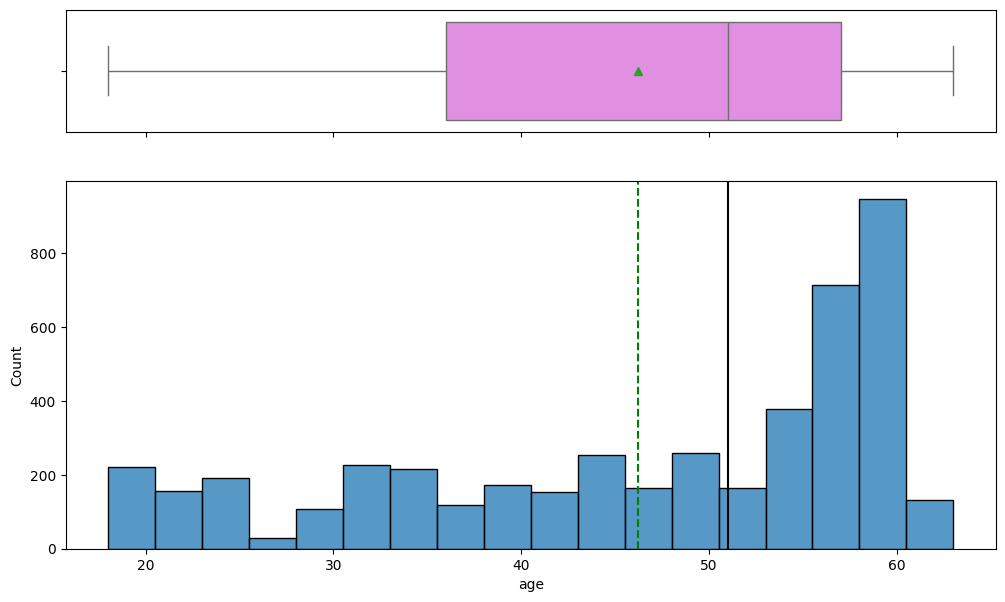

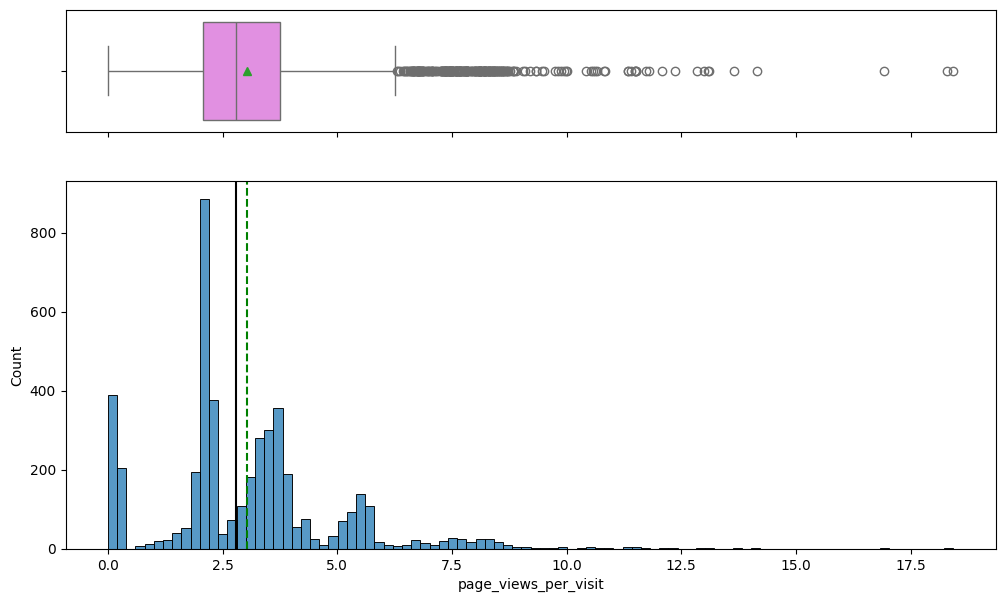

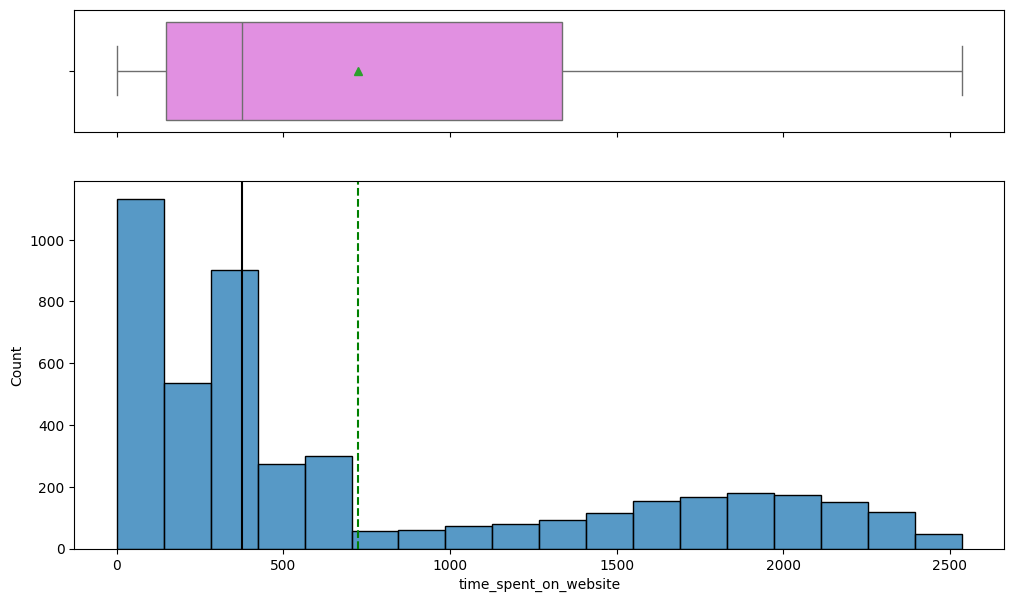

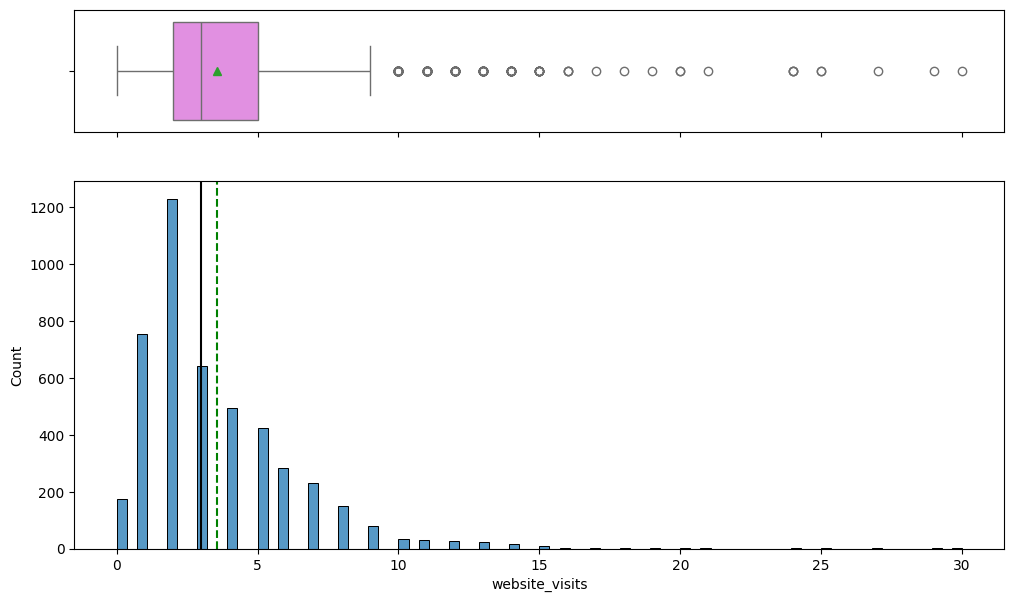

In [33]:
# create a list with the said columns
numerical_features = ['age','page_views_per_visit','time_spent_on_website','website_visits']
for x in numerical_features:
    histogram_boxplot(data, x, figsize=(12, 7), kde=False, bins=None)
    # print("="*30)

### Observations for the data plots above
* The mean age is about 46

* The mean number of pages viewed is about 3
* Most users spend an average of 700 units on the website
* The highest number of repeat website visits for a count of about 4. The mean is about 4 visits.

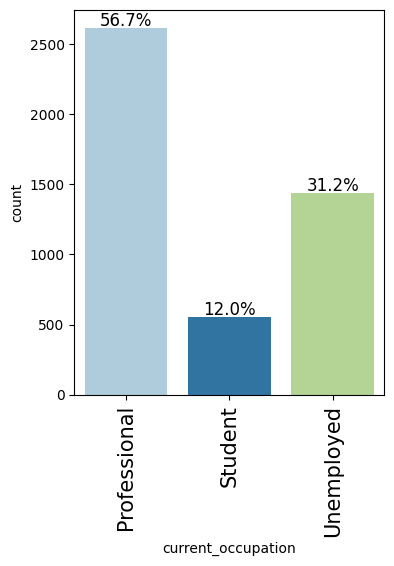

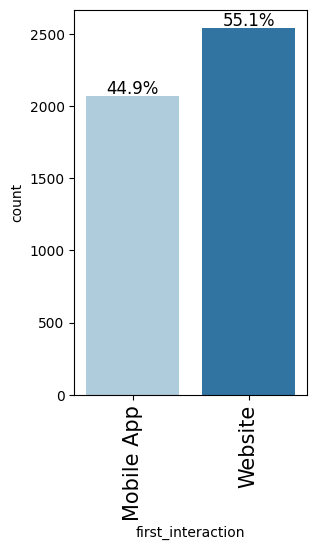

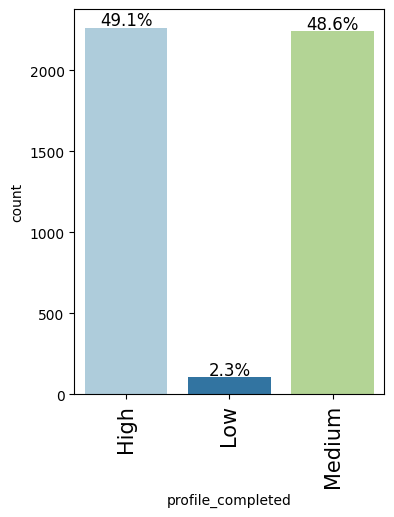

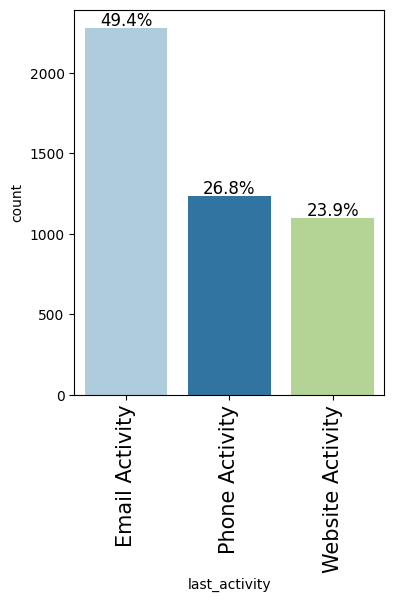

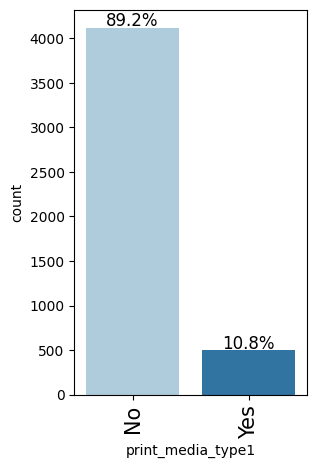

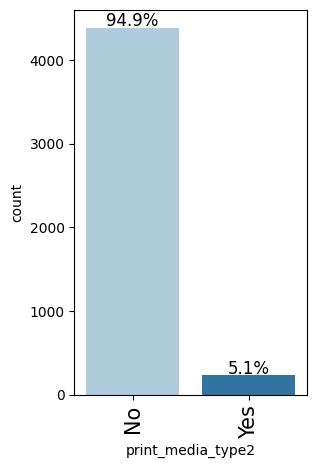

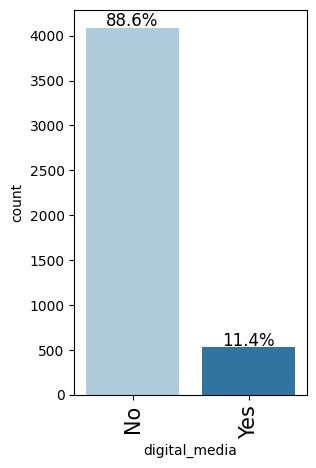

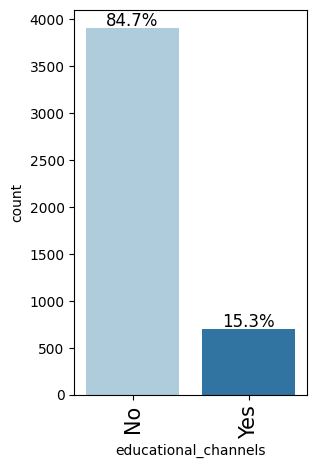

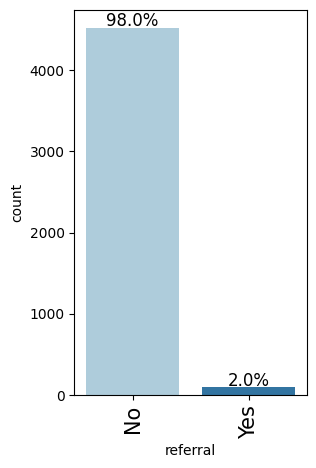

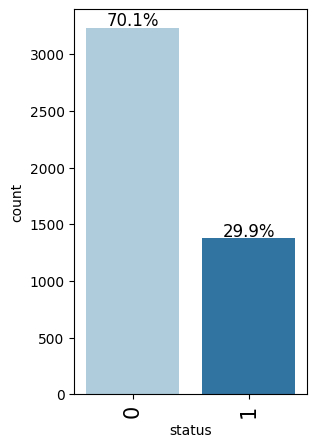

In [34]:
# create a list with the said columns
categorical_features = ['current_occupation','first_interaction','profile_completed','last_activity','print_media_type1','print_media_type2','digital_media','educational_channels','referral','status']

for x in categorical_features:
    labeled_barplot(data1, x, perc=True)


### Observations for the data plots above
* 56.7% of the users are working professionals, compared to students (12.0%) and unemployed prospects (31.2%)

* The interaction via website is higher than via mobile app.
* Profile completion is signficant when it is fully or medium completed.
* Email activity is signficantly higher than other channels.
* Most users used traditional print media channels such as newspapers and magazines, which may correlate with the age set who have shown interest and have the income.
* Most users did not hear of us via digital media channels. Perhaps they used traditional channels
* Most users did not hear of ExtraaLearn via education channels. Perhaps this is something that can be reviewed regarding where we market?
* Referrals are very few
* Converted leads are about 29.9% based on the current data

status                 0     1   All
current_occupation                  
All                 3235  1377  4612
Professional        1687   929  2616
Unemployed          1058   383  1441
Student              490    65   555
------------------------------------------------------------------------------------------------------------------------


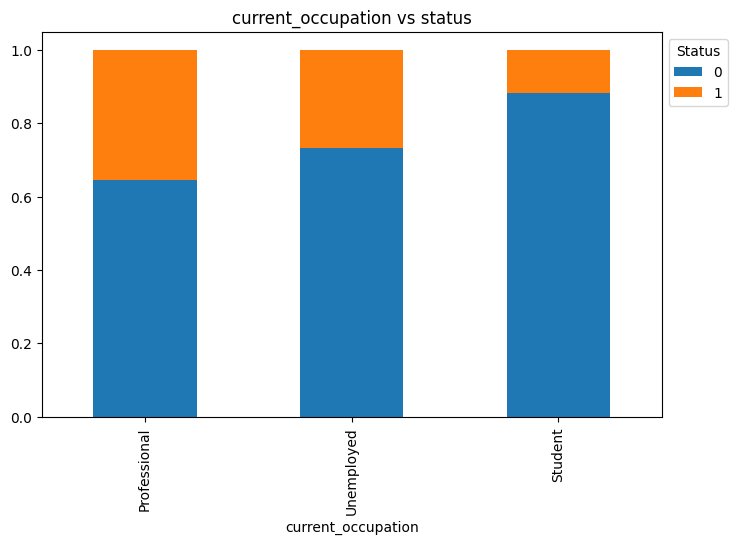

status                0     1   All
first_interaction                  
All                3235  1377  4612
Website            1383  1159  2542
Mobile App         1852   218  2070
------------------------------------------------------------------------------------------------------------------------


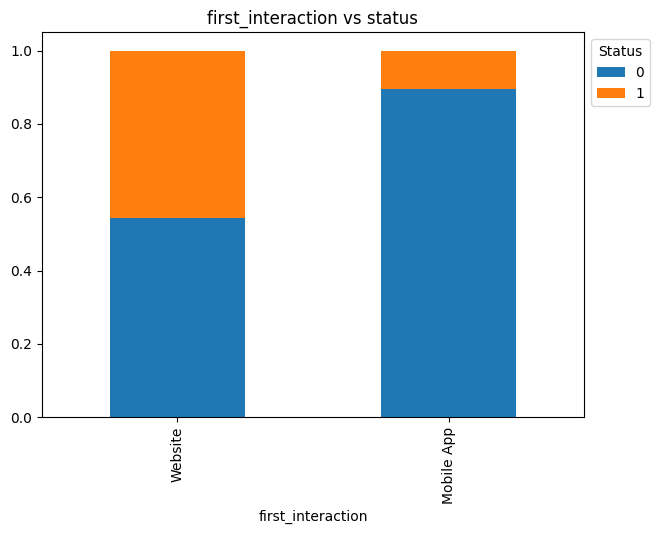

status                0     1   All
profile_completed                  
All                3235  1377  4612
High               1318   946  2264
Medium             1818   423  2241
Low                  99     8   107
------------------------------------------------------------------------------------------------------------------------


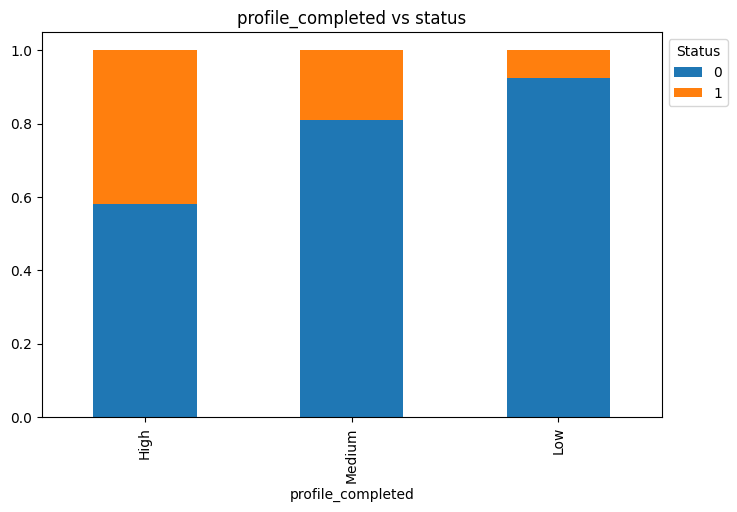

status               0     1   All
last_activity                     
All               3235  1377  4612
Email Activity    1587   691  2278
Website Activity   677   423  1100
Phone Activity     971   263  1234
------------------------------------------------------------------------------------------------------------------------


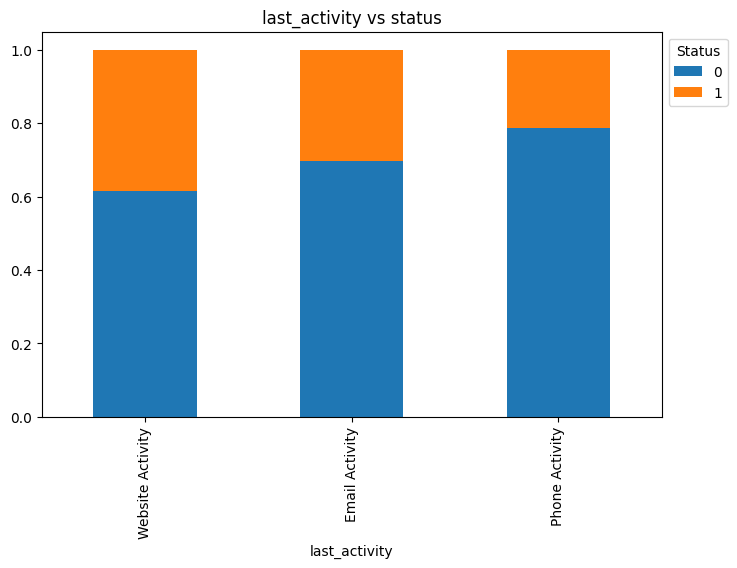

status                0     1   All
print_media_type1                  
All                3235  1377  4612
No                 2897  1218  4115
Yes                 338   159   497
------------------------------------------------------------------------------------------------------------------------


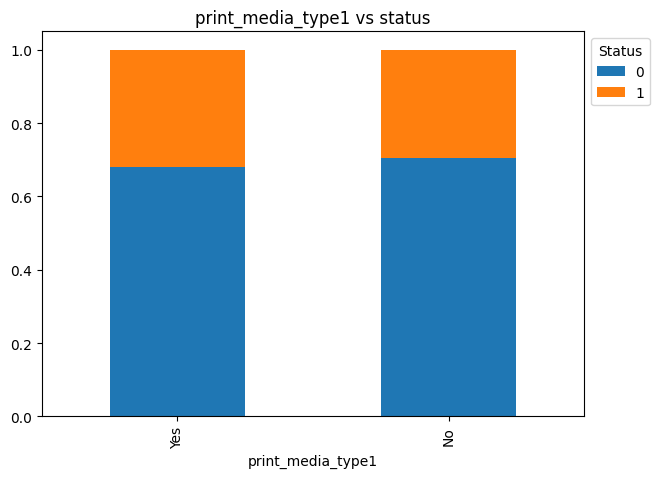

status                0     1   All
print_media_type2                  
All                3235  1377  4612
No                 3077  1302  4379
Yes                 158    75   233
------------------------------------------------------------------------------------------------------------------------


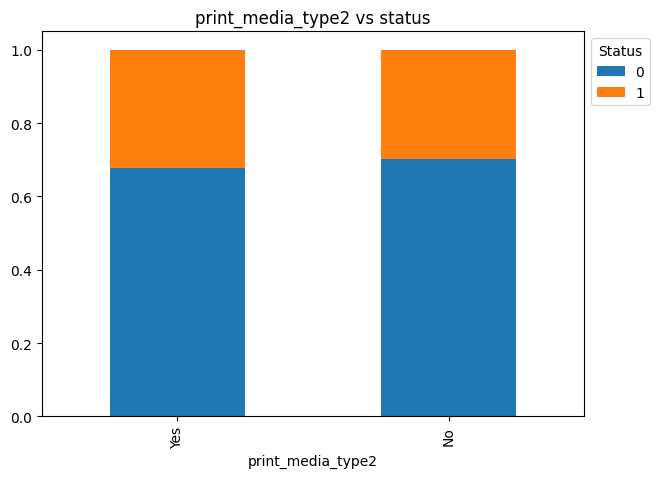

status            0     1   All
digital_media                  
All            3235  1377  4612
No             2876  1209  4085
Yes             359   168   527
------------------------------------------------------------------------------------------------------------------------


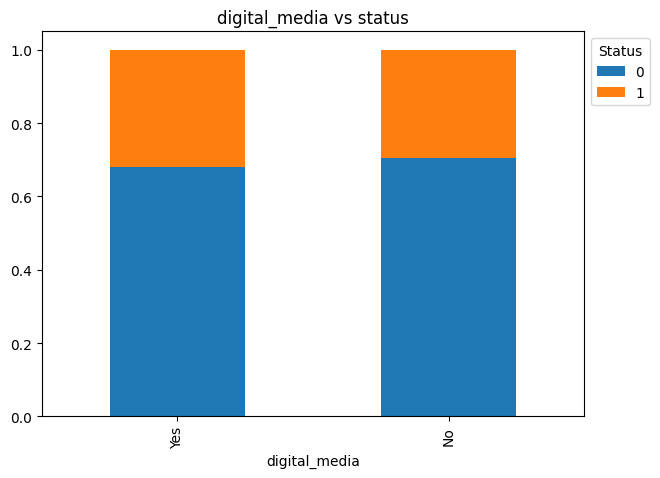

status                   0     1   All
educational_channels                  
All                   3235  1377  4612
No                    2727  1180  3907
Yes                    508   197   705
------------------------------------------------------------------------------------------------------------------------


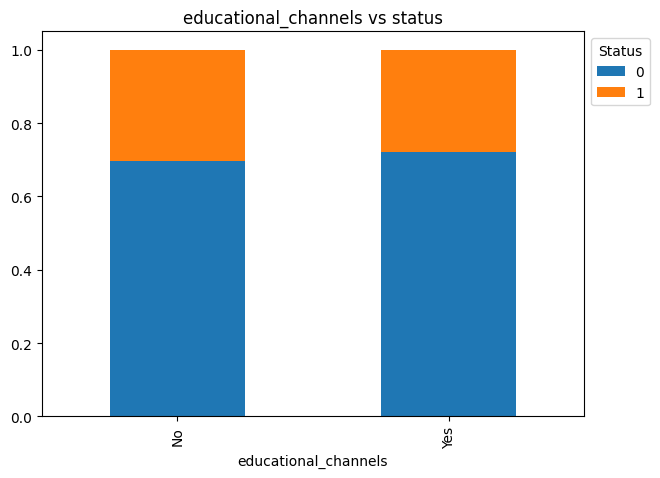

status       0     1   All
referral                  
All       3235  1377  4612
No        3205  1314  4519
Yes         30    63    93
------------------------------------------------------------------------------------------------------------------------


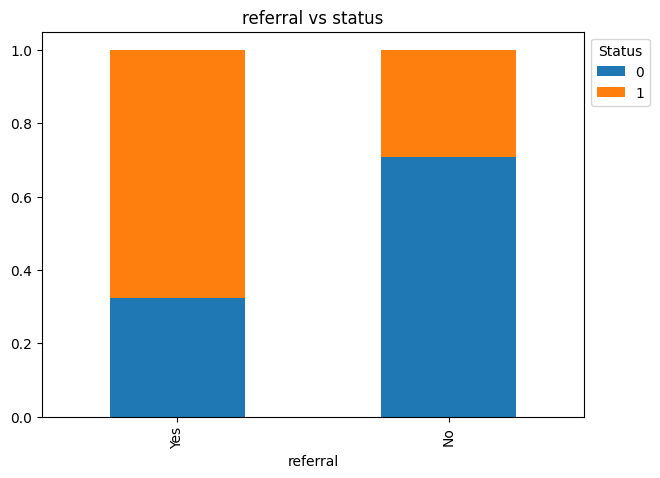

In [35]:
# create a list with the said columns
categorical_features = ['current_occupation','first_interaction','profile_completed','last_activity','print_media_type1','print_media_type2','digital_media','educational_channels','referral','status']

for x in categorical_features:
    stacked_barplot(data1, x, 'status')


### Observations for the data plots above, relative to the status

* Most conversions are for professionals
* The website is a useful channel for creating leads that convert as opposed to the mobile app
* Those who complete their profiles seem to stand a higher chance of turning into leads
* The prospects who use the website tend to convert more compared to email and telephone leads
* When referals are given, they tend to convert to leads


### Carry out Bivariate Analysis on the Data

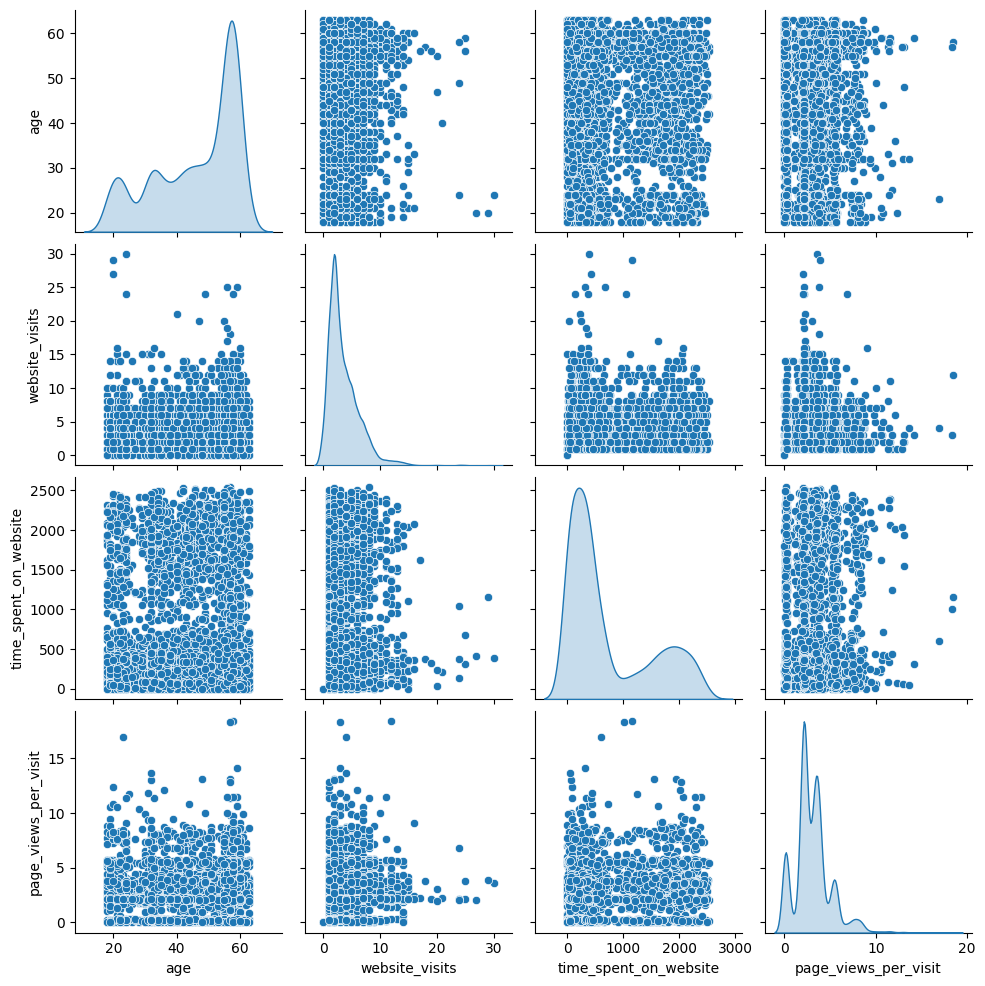

In [36]:
data_attr = data1.iloc[:, 0:7]
sns.pairplot(data_attr, diag_kind='kde')   # to plot density curve instead of histogram on the diag

### Observations for the data plots above, relative to the status

* The age and number of page visits seem evenly distributed, apart from a few outliers, that may need to be investigated

* The age against the time spent on the website seems evenly distributed and thus we can't draw too much from this

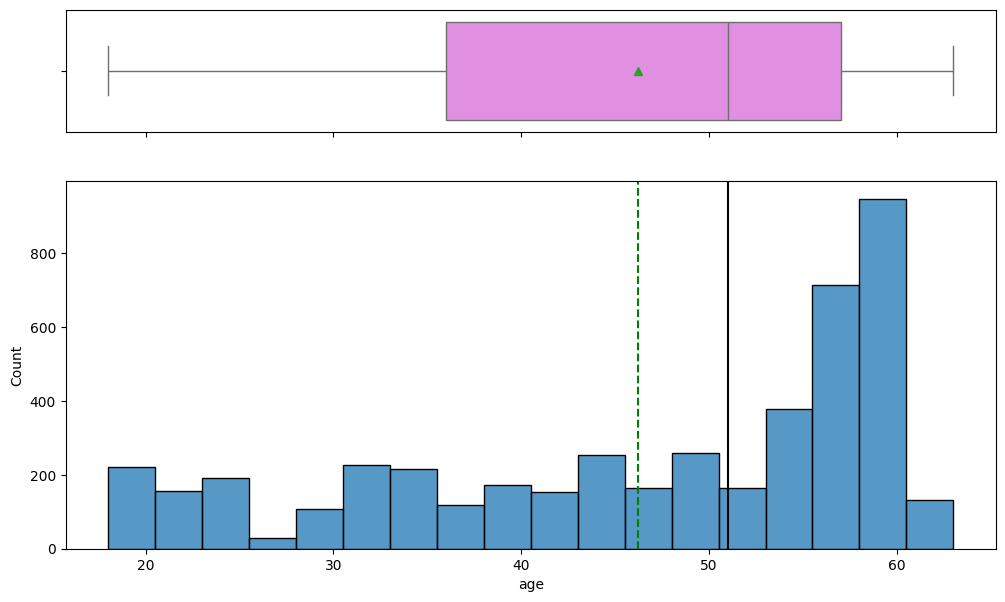

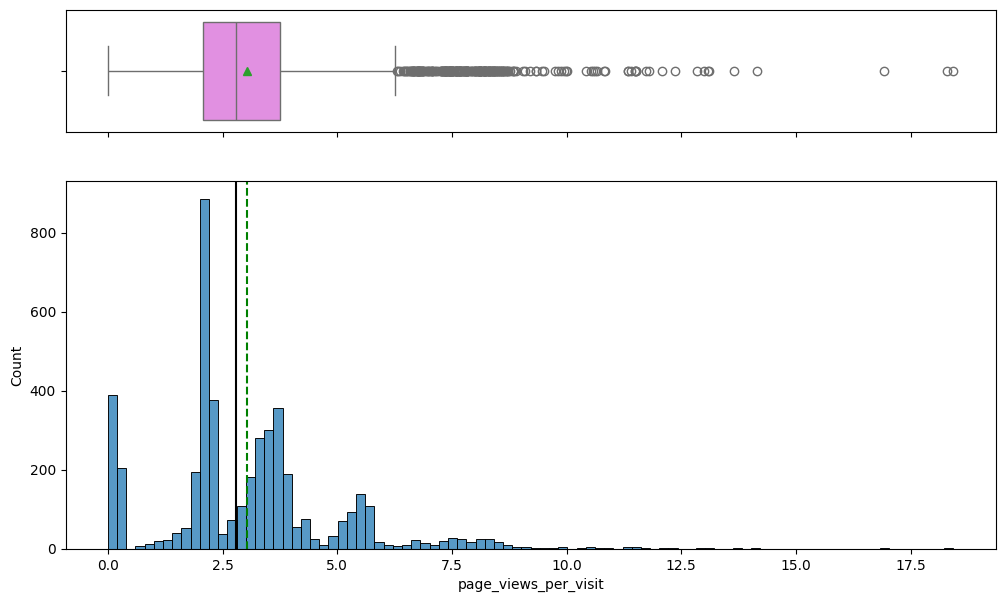

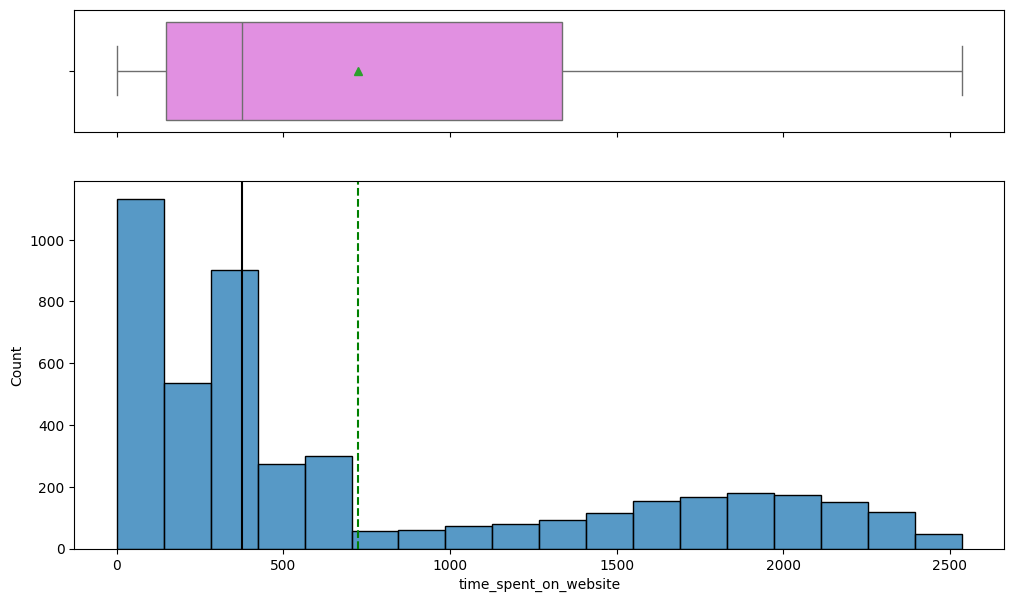

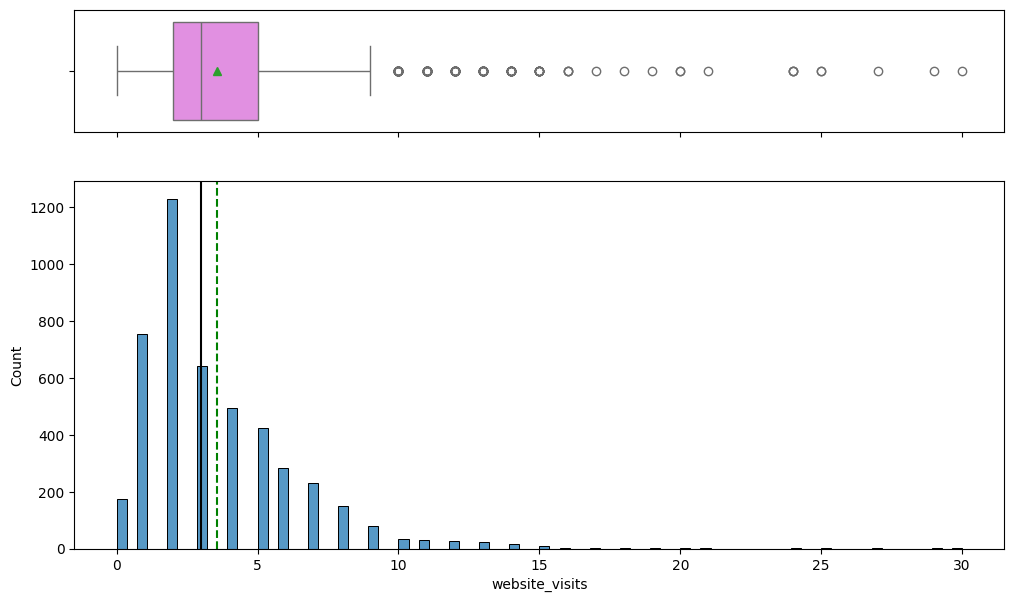

In [37]:
# create a list with the said columns
numerical_features = ['age','page_views_per_visit','time_spent_on_website','website_visits']
for x in numerical_features:
    histogram_boxplot(data, x, figsize=(12, 7), kde=False, bins=None)
    # print("="*30)

### Observations for the data plots above
* The mean age is about 46

* The mean number of pages viewed is about 3
* Most users spend an average of 700 units on the website
* The highest number of repeat website visits for a count of about 4. The mean is about 4 visits.

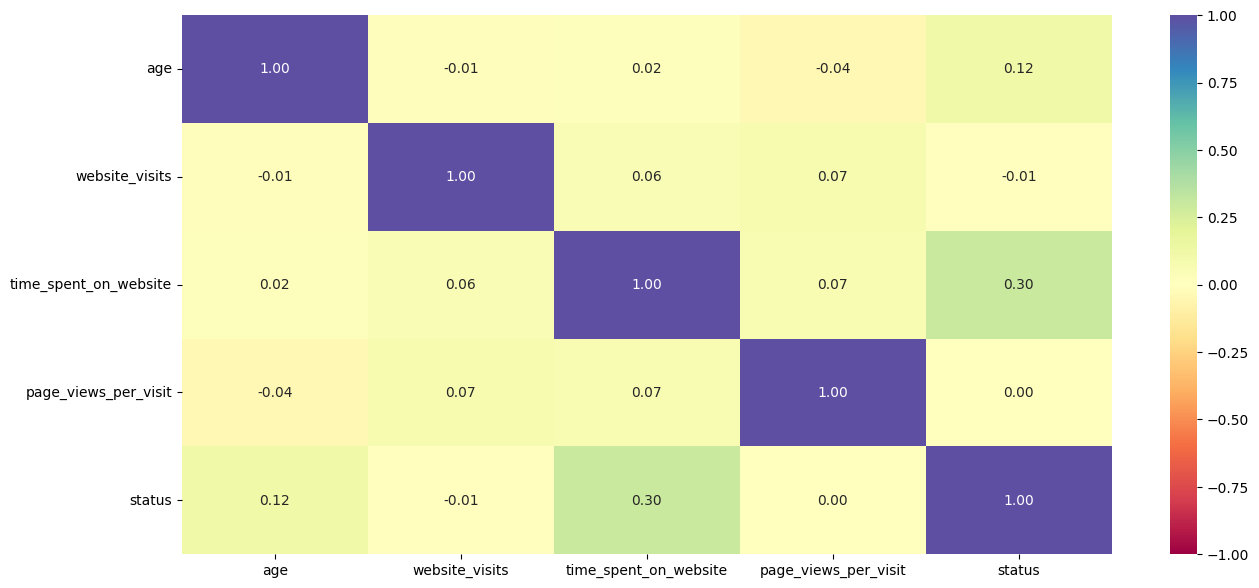

In [38]:
# Use the original data first to draw the conclusions from there. We use the data1 object which was an original copy of the data
numeric_data = data1.select_dtypes(include=[np.number])
# numeric_data = data.select_dtypes(include=['float64', 'int64'])


# Finding the correlation between various columns of the dataset
plt.figure(figsize=(15, 7))
sns.heatmap(numeric_data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

### Observations
- [age] and [status] are positively correlated, indicating that this could be an important relationship

- The more time is spent on the website, the higher the chances of conversation of the lead. 
- The more time is spent on the website, the higher the chances of more pages on the website being viewed 
- More website visits do not necessarily mean more leads are converted. This may show that time spent on the site is more important
- As [age] and website visits are negatively correlated, it may show that the older prospects are clear what they are looking for in fewer visits than younger ones.

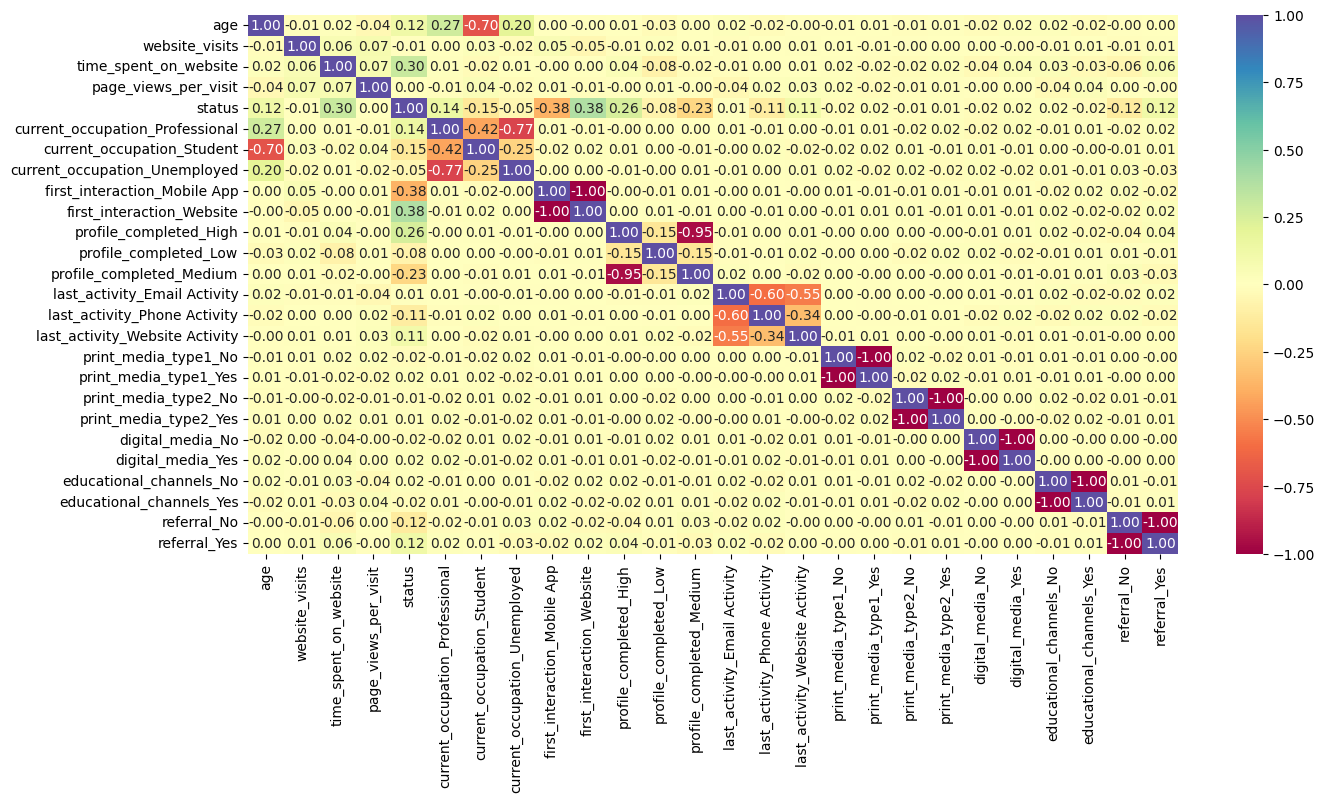

In [39]:
# Use the updated data frame object data to check if we can draw anything else from this data frame . We use the [data] object
numeric_data = data.select_dtypes(include=[np.number])
# numeric_data = data.select_dtypes(include=['float64', 'int64'])


# Finding the correlation between various columns of the dataset
plt.figure(figsize=(15, 7))
sns.heatmap(numeric_data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

### Observations
- [age] and [status] are positively correlated, indicating that this could be an important relationship

- The more time is spent on the website, the higher the chances of conversation of the lead. 
- The more time is spent on the website, the higher the chances of more pages on the website being viewed 
- More website visits do not necessarily mean more leads are converted. This may show that time spent on the site is more important
- As [age] and website visits are negatively correlated, it may show that the older prospects are clear what they are looking for in fewer visits than younger ones.
- Curiously, first interaction via mobile does not lead to more conversions. This is something that may be correlated to high mean age of the current users of the website.
- The more the profile is completed, the higher the chance of leade conversion
- If the current occupation is [Professional], then chances of a higher mean age is expected.
- The lower the age, the higher the likelihood of unemployment.

### **Let's find the percentage of outliers, in each column of the data, using IQR.**

In [40]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Calculate quartiles and IQR
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1

# Find lower and upper bounds for outliers
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

In [41]:
(
    (data.select_dtypes(include=["float64", "int64"]) < lower)
    | (data.select_dtypes(include=["float64", "int64"]) > upper)
).sum() / len(data) * 100

age                                0.00000
website_visits                     3.33912
time_spent_on_website              0.00000
page_views_per_visit               5.57242
status                             0.00000
current_occupation_Professional    0.00000
current_occupation_Student        12.03382
current_occupation_Unemployed      0.00000
first_interaction_Mobile App       0.00000
first_interaction_Website          0.00000
profile_completed_High             0.00000
profile_completed_Low              2.32003
profile_completed_Medium           0.00000
last_activity_Email Activity       0.00000
last_activity_Phone Activity       0.00000
last_activity_Website Activity    23.85082
print_media_type1_No              10.77624
print_media_type1_Yes             10.77624
print_media_type2_No               5.05204
print_media_type2_Yes              5.05204
digital_media_No                  11.42671
digital_media_Yes                 11.42671
educational_channels_No           15.28621
educational

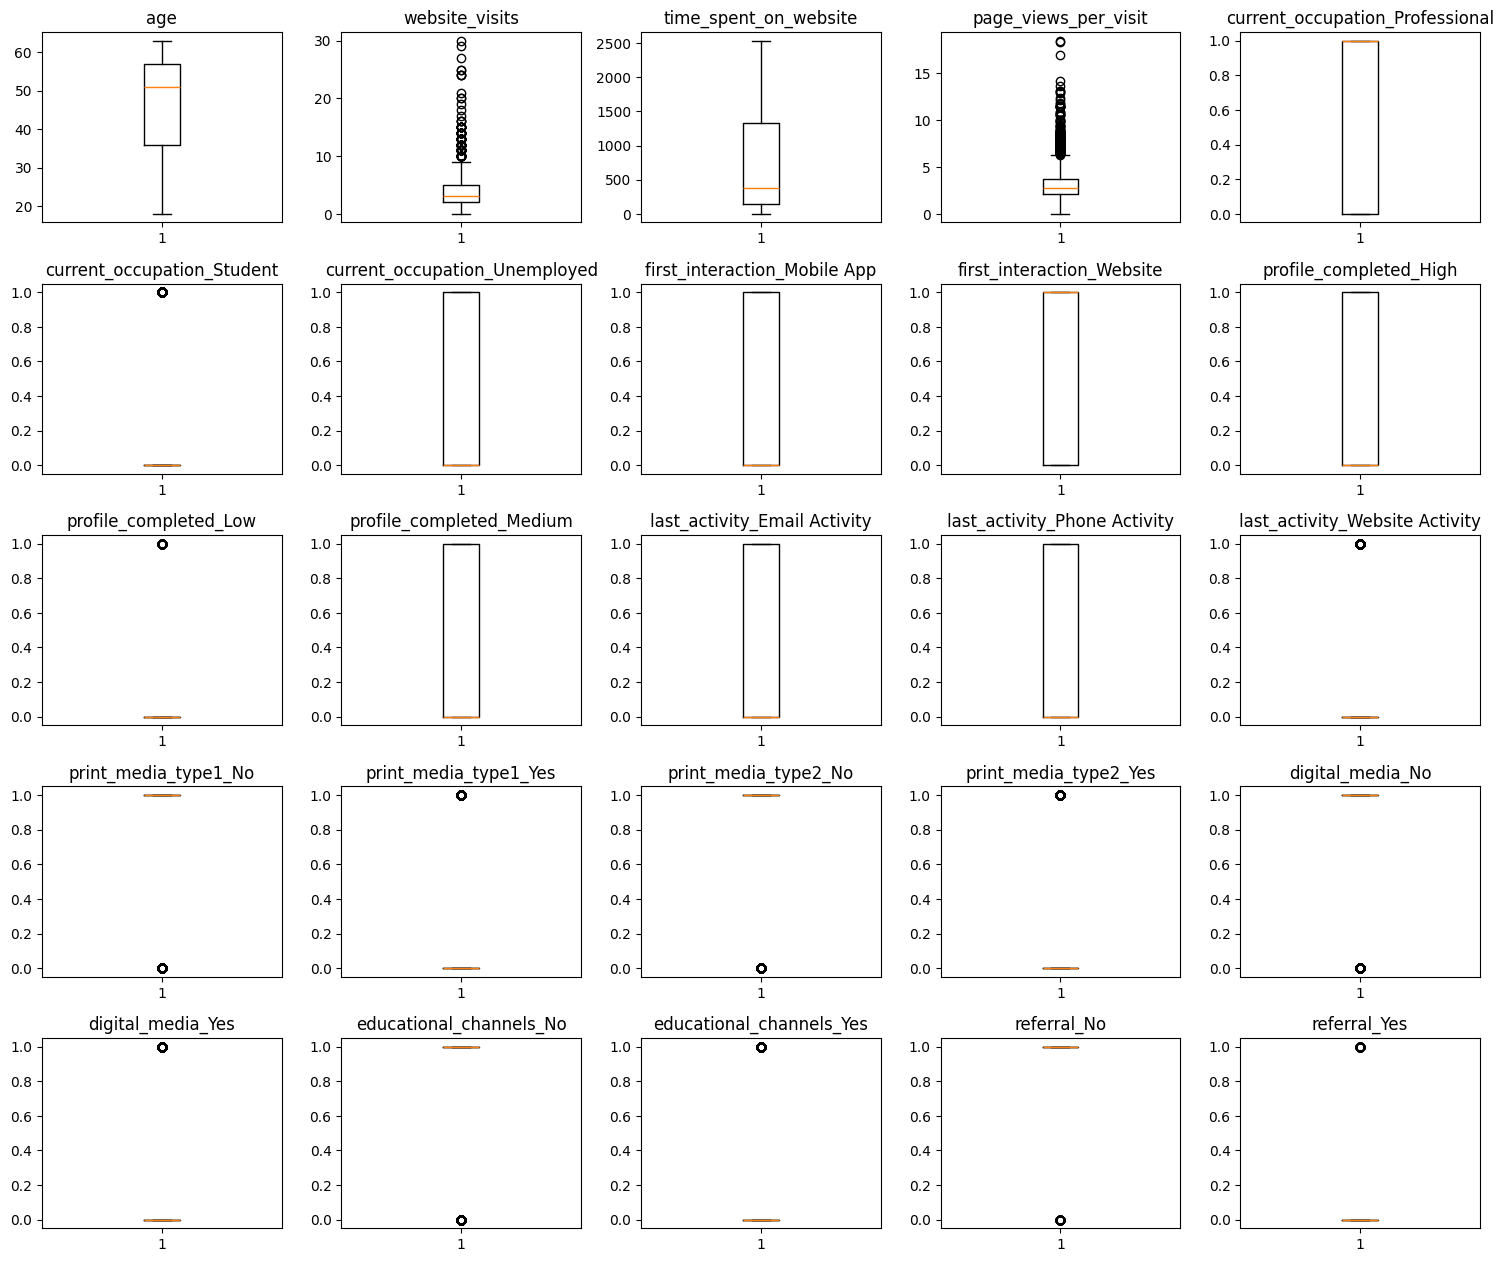

In [42]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
# dropping status as it is an output value that will not be used as part of the data
numeric_columns.remove("status")

plt.figure(figsize=(15, 15))

for i, variable in enumerate(numeric_columns):
    plt.subplot(6, 5, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [43]:
X = data1.drop(["status"], axis=1)
Y = data1["status"] # Complete the code to define the dependent (target) variable

X = pd.get_dummies(X, drop_first=True) # Complete the code to get dummies for X

# Splitting the data in 70:30 ratio for train to test data
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [44]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
print(X_train.shape, X_test.shape)

(3228, 16) (1384, 16)


In [45]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3228, 16)
Shape of test set :  (1384, 16)
Percentage of classes in training set:
status
0   0.70415
1   0.29585
Name: proportion, dtype: float64
Percentage of classes in test set:
status
0   0.69509
1   0.30491
Name: proportion, dtype: float64


In [47]:
# Function to print the classification report and get confusion matrix in a proper format

def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    
    cm = confusion_matrix(actual, predicted)
    
    plt.figure(figsize = (8, 5))
    
    sns.heatmap(cm, annot = True,  fmt = '.2f', xticklabels = ['Not Converted', 'Converted'], yticklabels = ['Not Converted', 'Converted'])
    
    plt.ylabel('Actual')
    
    plt.xlabel('Predicted')
    
    plt.show()

## Building a Decision Tree model

In [48]:
# Building decision tree model

model_dt= DecisionTreeClassifier(random_state=1,max_depth=8)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, random_state=1)

**Let's check the model performance of decision tree we have instatiated above**

              precision    recall  f1-score   support

           0       0.92      0.95      0.94      2273
           1       0.87      0.81      0.84       955

    accuracy                           0.91      3228
   macro avg       0.90      0.88      0.89      3228
weighted avg       0.91      0.91      0.91      3228



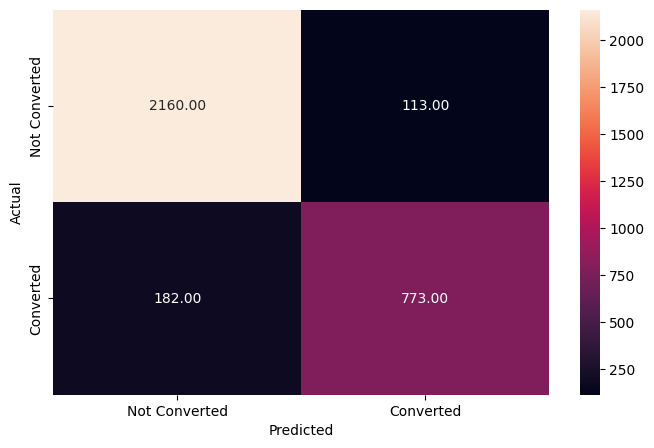

In [49]:
# Checking performance on the training dataset

pred_train_dt = model_dt.predict(X_train)
metrics_score(y_train, pred_train_dt)

**Observation:**
* Model has performed very well on the training set.
* As we know a decision tree will continue to grow and classify each data point correctly if no restrictions are applied as the trees will learn all the patterns in the training set.

**Let's check the performance on test data to see if the model is overfitting.**

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       962
           1       0.79      0.71      0.75       422

    accuracy                           0.85      1384
   macro avg       0.83      0.81      0.82      1384
weighted avg       0.85      0.85      0.85      1384



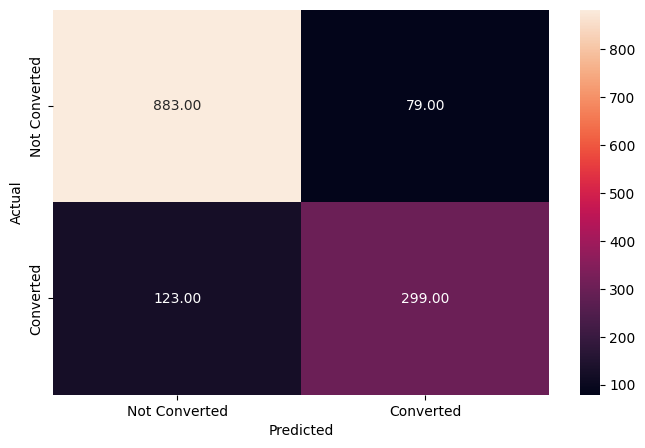

In [50]:
pred_test_dt = model_dt.predict(X_test)
metrics_score(y_test, pred_test_dt)

**Observation:**
* The decision tree model is slightly underfitting the data here in test mode
* We may need to tune the hyperparameters to increase the performance and reduce underfitting and increase test performance.

In [51]:
# Choose the type of classifier 
d_tree_tuned = DecisionTreeClassifier(random_state = 7, class_weight = {0: 0.3, 1: 0.7})

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 10), 
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(d_tree_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
d_tree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
d_tree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, criterion='entropy',
                       max_depth=3, min_samples_leaf=5, random_state=7)

*** Check the training model  after Hyperparameter tuning

              precision    recall  f1-score   support

           0       0.92      0.95      0.94      2273
           1       0.87      0.81      0.84       955

    accuracy                           0.91      3228
   macro avg       0.90      0.88      0.89      3228
weighted avg       0.91      0.91      0.91      3228



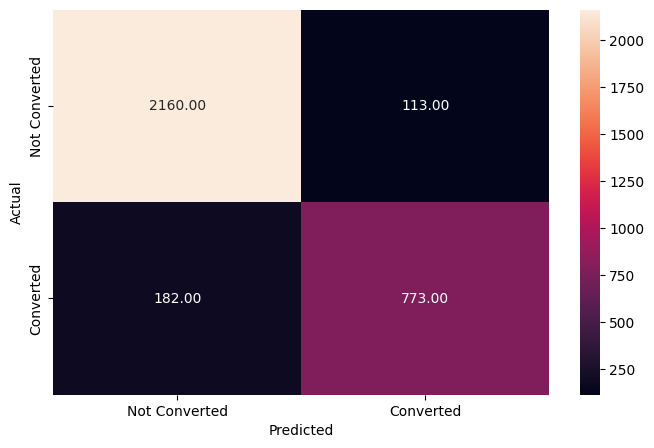

In [52]:
# Checking performance on the training dataset

pred_train_dt_2 = model_dt.predict(X_train)
metrics_score(y_train, pred_train_dt_2)

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       962
           1       0.79      0.71      0.75       422

    accuracy                           0.85      1384
   macro avg       0.83      0.81      0.82      1384
weighted avg       0.85      0.85      0.85      1384



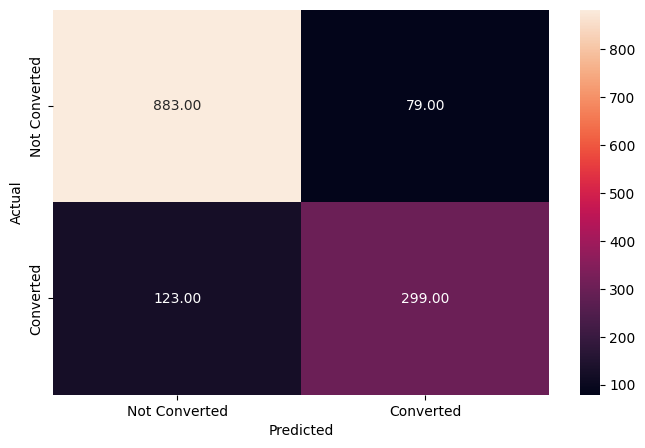

In [56]:
# Checking performance on the training dataset

pred_test_dt_2 = model_dt.predict(X_test)
metrics_score(y_test, pred_test_dt_2)

** Create a visual of the Descision Tree to allow us to review the data distributions and intractions a little bit further

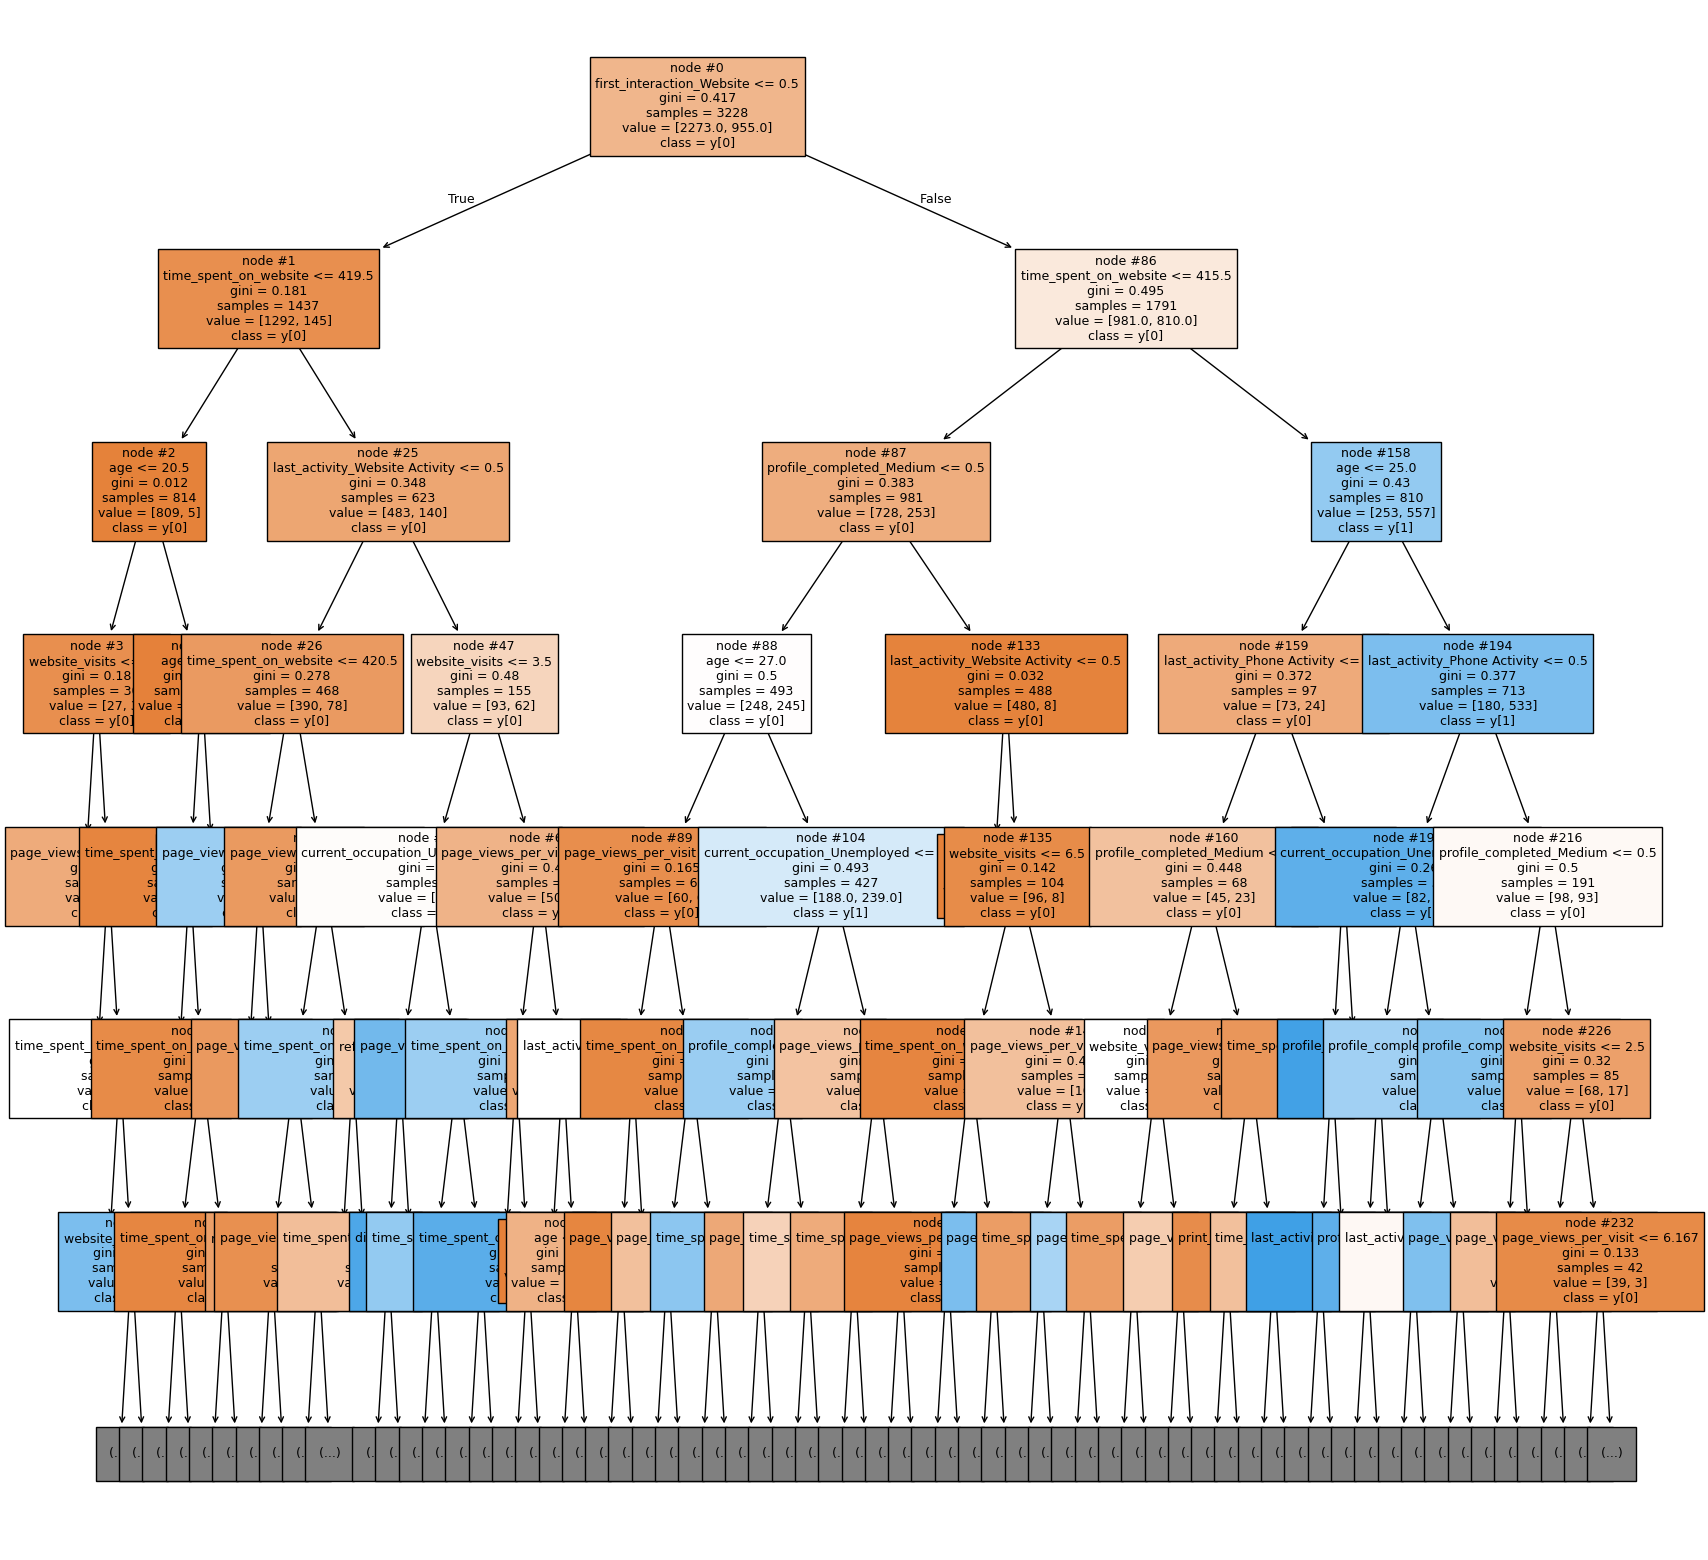

In [57]:
features = list(X_train.columns)

plt.figure(figsize=(20,20))
from sklearn import tree
tree.plot_tree(model_dt,feature_names=features,max_depth =6, filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

### Visualise the Features that would be most important

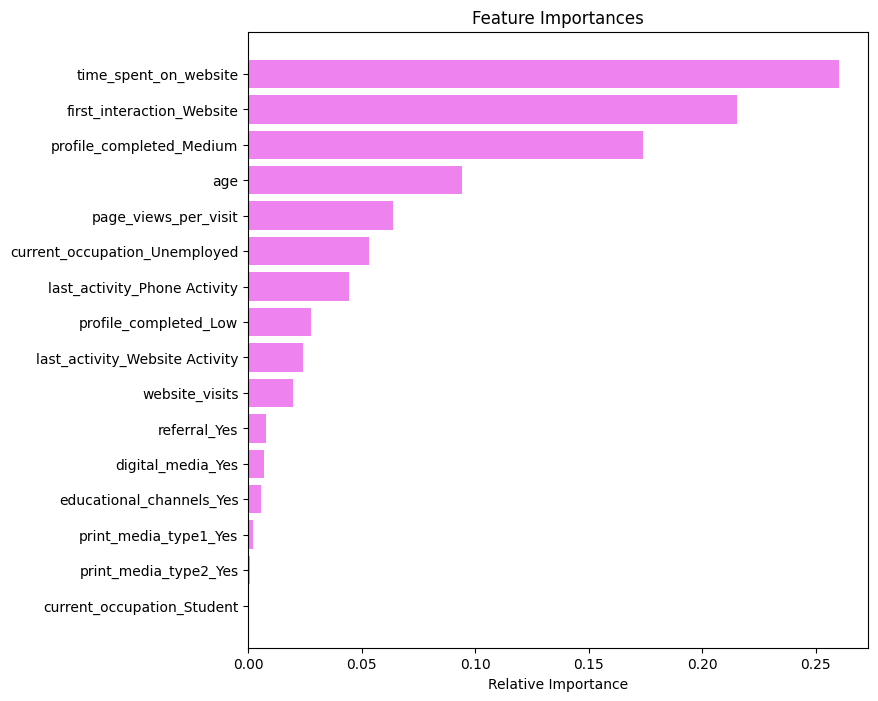

In [58]:
# Importance of features in the tree building

feature_names = list(X_train.columns)
importances = model_dt.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Do we need to prune the tree?

* I don't think that pruning is necessary in this case. The attempts at pruning are leading to lower performance metrics

In [59]:
# Splitting the data once gain in 70:30 ratio for train to test data
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [65]:
# Function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# Function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# Function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    pred = model.predict(predictors)                  # Predict using the independent variables
    r2 = r2_score(target, pred)                       # To compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)    # To compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # To compute RMSE
    mae = mean_absolute_error(target, pred)           # To compute MAE
    mape = mape_score(target, pred)                   # To compute MAPE

    # Creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [66]:
# Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state = 1)

# Fitting the model
dt_regressor.fit(X_train, y_train)

# Model Performance on the test data, i.e., prediction
dt_regressor_perf_test = model_performance_regression(dt_regressor, X_test, y_test)

dt_regressor_perf_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.43260,0.18714,0.11703,0.10669,inf


Use the Gradient Booser Algorithm first to create a statistical report

In [67]:
# Importing Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

# Gradient Boosting Regressor
grad_regressor = GradientBoostingRegressor(random_state=1)

# Fitting the model
grad_regressor.fit(X_train, y_train)

# Model Performance on the test data
grad_regressor_perf_test = model_performance_regression(grad_regressor, X_test, y_test)

grad_regressor_perf_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.32215,0.23242,0.51034,0.50461,inf


### Use the XBoost Regressor to prune the tree and see if it leads to any performance enhacement

In [68]:
# Importing XGBoost Regressor
from xgboost import XGBRegressor

# XGBoost Regressor
xgb = XGBRegressor(random_state = 1)

# Fitting the model
xgb.fit(X_train,y_train)

# Model Performance on the test data
xgb_perf_test = model_performance_regression(xgb, X_test, y_test)

xgb_perf_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.33874,0.22830,0.45861,0.45227,inf


## Building a Random Forest model

In [69]:
# Fitting the Random Forest classifier on the training data
rf_estimator = RandomForestClassifier(random_state = 1)

rf_estimator.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

### View the perfomance output

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2273
           1       1.00      1.00      1.00       955

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



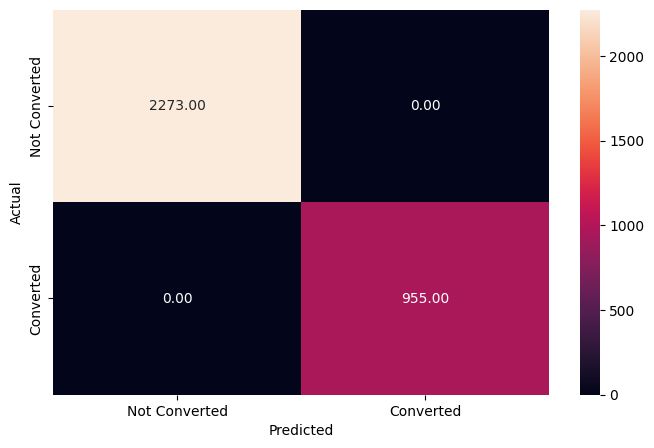

In [70]:
# Checking performance on the training data
y_pred_train_rf = rf_estimator.predict(X_train)

metrics_score(y_train, y_pred_train_rf)

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       962
           1       0.78      0.68      0.73       422

    accuracy                           0.84      1384
   macro avg       0.82      0.80      0.81      1384
weighted avg       0.84      0.84      0.84      1384



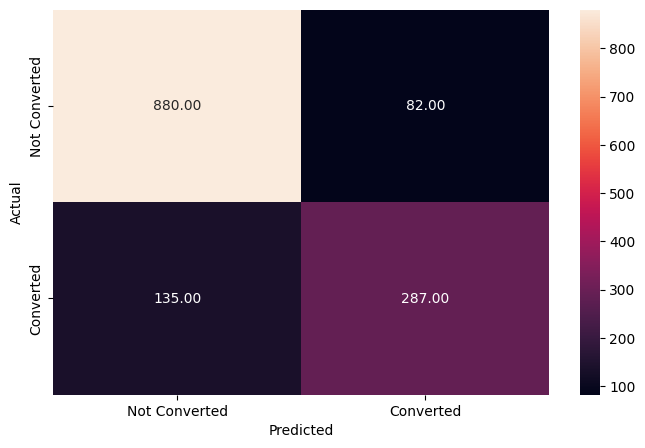

In [72]:
# Checking performance on the training data
y_pred_test_rf = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test_rf)

## Do we need to prune the tree?

### Yes. There is need to prune.
* There is too much overfitting in the training data set, which could lead to wrong conclusions drawn in a production environment

In [73]:
# Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators = 100, random_state = 1)

# Fitting the model
rf_regressor.fit(X_train, y_train)

# Model Performance on the test data
rf_regressor_perf_test = model_performance_regression(rf_regressor, X_test, y_test)

rf_regressor_perf_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.32876,0.19805,0.49003,0.48407,inf


In [75]:
models_test_comp_df = pd.concat(
    [
        dt_regressor_perf_test.T,
        rf_regressor_perf_test.T,
        grad_regressor_perf_test.T,
        xgb_perf_test.T
    ],
    axis = 1,
)

models_test_comp_df.columns = [
    "Decision tree regressor",
    "Random Forest regressor",
    "Gradient Boosting Regressor",
    "XG Boost Regressor"]

print("Test performance comparison:")

models_test_comp_df.T

Test performance comparison:


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
Decision tree regressor,0.43260,0.18714,0.11703,0.10669,inf
Random Forest regressor,0.32876,0.19805,0.49003,0.48407,inf
Gradient Boosting Regressor,0.32215,0.23242,0.51034,0.50461,inf
XG Boost Regressor,0.33874,0.22830,0.45861,0.45227,inf


<Axes: xlabel='Importance', ylabel='None'>

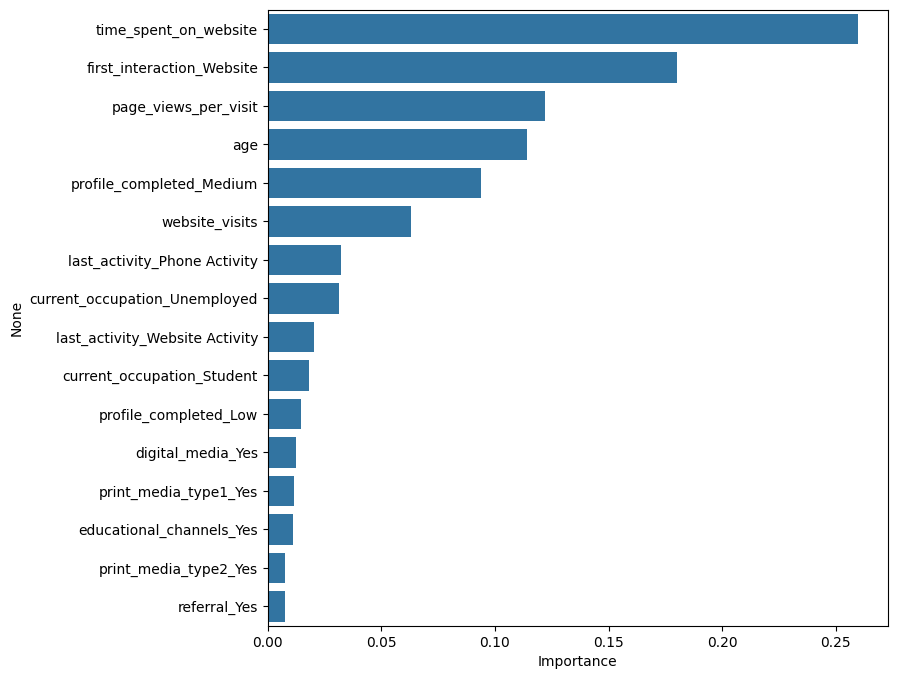

In [76]:
importances = rf_estimator.feature_importances_

columns = X_train.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (8, 8))

sns.barplot(x = importance_df.Importance, y = importance_df.index)

## Actionable Insights and Recommendations

### Decision Tree

* **Time spent on the website** seems to be the most significant feature. The most important pages should thus be ranked and tracked and analysed further

* **First time users on the website** also need to be engaged further to allow the sales and marketing team more opportunity to make more conversiona a reality.

* **Page views per visit** also indicate interest. Perhaps the different click-throughs need to be looked at and any further patterns analysed from this. it could lead to intersting conclusion that could be useful to the business and website management teams regarding how to lay out content on the website

* **Age** is a key factor. From the earlier analysis it seems that a more mature students (>35) are a better mark for conversion. Perhaps due to the fact that they have more experience and are in a space where they are keen to pivot

* **Users who have attempted to complete their profiles to a medium level** at least should be targeted for follow up. This indicates high potential interest.

* **Website Visits** seems to be a useful metric to analyse further. Perhaps it may be useful to combine with other metrics such as age, time spent on website, and completion of profiles.

* **Last phone activity** is a critical point of engagement, meaning that perhaps people who have caled in or picked calls from our call centre, should be consistently pursued towards closure.

* It is curious that **unemployment among the interested potential clients** is a factor worthy of note. How this correlates to the current economic environment, and other factors such as lay-offs in the wider economy may need to be looked at and targeted campaigns created by the marketing team.

* The Mean Absoulute Percentage Error (MAPE) having a value of INF may indicate an error in calculation, or may be we need to avoid the use of MAPE in situations where zero values are common or expected as is the case with this dataset. The data preprocessing was followed through properly, thus it is unlikely that this is the reason.

### Random Forest
* **Time spent on the website** still seems to be the most significant feature. The most important pages should thus be ranked and tracked and analysed further

* **First time users on the website** also need to be engaged further to allow the sales and marketing team more opportunity to make more conversiona a reality.

* **Users who have attempted to complete their profiles to a medium level** at least should be targeted for follow up. This indicates high potential interest.

* **Age** is a more important factor in the Random Forest Feature set than in the Decision Tree. From the earlier analysis it seems that a more mature students (>35) are a better mark for conversion. Perhaps due to the fact that they have more experience and are in a space where they are keen to pivot

* **Page views per visit also indicate interest.** Perhaps the different click-throughs need to be looked at and any further patterns analysed from this. it could lead to intersting conclusion that could be useful to the business and website management teams regarding how to lay out content on the website

* It is curious that **unemployment among the interested potential clients** is a factor worthy of note. How this correlates to the current economic environment, and other factors such as lay-offs in the wider economy may need to be looked at and targeted campaigns created by the marketing team.

* **Last phone activity** is a critical point of engagement, meaning that perhaps people who have caled in or picked calls from our call centre, should be consistently pursued towards closure.

* The Mean Absoulute Percentage Error (MAPE) having a value of INF may indicate an error in calculation, or may be we need to avoid the use of MAPE in situations where zero values are common or expected as is the case with this dataset. The data preprocessing was followed through properly, thus it is unlikely that this is the reason.

### Further Recommendations
- The features with high outliers, and calculated using the Interquartile Range value, show little significance in the final features that we should consider.

- The company's first interaction with leads should be compelling, persuasive and as memorable as possible to ensure we close as many leads as possible.

- There may be need for further training of the model with a lot more data than what has been provided to ensure that we mitigate the risks of underfitting and overfitting. A larger data set may lead to more integrity in the model training. This is because the test results could be better, and the hyperparameter interventions seem to lead to much worse results when analysing the RMSE, R-Squared and Adjusted R-Squared metrics.

- It would be advisable to create a pipeline that includes a Column Transformer to preprocess the data and a model that has been trained on the data.  This pipeline can be used in future applications or as a starting point for further model development.

- Using a pipeline with a Column Transformer is useful to ensure that data preprocessing is consistent and can be easily reproduced. The pipeline will take care of data preprocessing and model training in a single step, making it easy to use the model in other applications should we wish to.

- Saving the trained model in the Pickle data format allows for easy serialization and deserialization of the model, making it possible to use the model in other applications without needing to retrain it. This would be particularly useful when working with large datasets or models that take a long time to train.

- The Test data would defintely grow and thus the recommendations above.

- The website is a useful channel for creating leads that convert as opposed to the mobile app. It would be good to investigate why this is the case and seek to optimise the mobile app. Could we be missing an opportunity here.

- The prospects who use the website tend to convert more compared to email and telephone leads. It would be good to investigate this further.

- We may need to find out why most prospects prefer traditional media to digital media regarding where they consume our advertisements. Alternatively, we may need to find out why this is the case and if indeed it will remain as such in future.

- Perhaps we may need to reduce engagement with educational channels, since the majority of our prospects come from professional sources or ecosystems. Alternatively, we may need to find out why this is the case and if indeed it will remain as such in future.